In [1]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('data/US-pumpkins.csv')

full_pumpkins.head()
print(full_pumpkins.isnull().sum())

columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]
pumpkins.dropna(inplace=True)
print(pumpkins.head())

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64
   City Name       Package      Variety    Origin Item Size   Color
2  BALTIMORE  24 inch bins  HOWDEN TYPE  DELAWARE       med  ORANGE
3  BALTIMORE  24 inch bins  HOWDEN TYPE  VIRGINIA       med  ORANGE
4  BALTIMORE  24 inch bins  HOWDEN TYPE  MARYLAND       lge  ORANGE
5  BALTIMORE  24 inch bins  HOWDEN TYPE  MARYLAND       lge  ORANGE
6  BALTIMORE  36 inch b

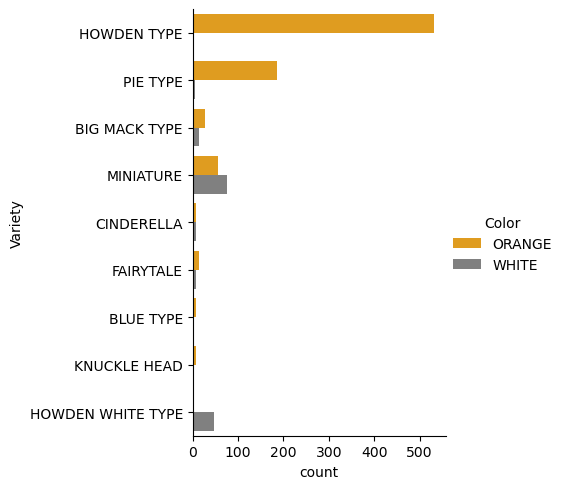

In [2]:
import seaborn as sns
# Specify colors for each values of the hue variable
palette = {
    'ORANGE': 'orange',
    'WHITE': 'gray',
}
# Plot a bar plot to visualize how many pumpkins of each variety are orange or white
sns.catplot(
    data=pumpkins, y="Variety", hue="Color", kind="count",
    palette=palette, 
)

<h1>Preprocessing</h1>

Change the categorical data to numeric ones by using labelencoder
<p>पम्पकिनको साइज कतेगोरिकल भएकोले गरदा एस्लाई एन्कोद गर्नुपर्ने हुन्छ। एसो गर्दाखेरी छुटाउने अल्गोरिथ्मले राम्रो गरी काम गर्छ। साइजमा ठुलो-सानो श्रेनी भएकोले ओर्दिनल एन्कोदिङ गर्नु बेस हुन्छ।  </p>

In [3]:
itemsize = pumpkins['Item Size'].unique()
print(itemsize)

['med' 'lge' 'sml' 'xlge' 'med-lge' 'jbo' 'exjbo']


In [4]:

from sklearn.preprocessing import OrdinalEncoder

item_size_categories = ['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=[item_size_categories])

item_size_categories_reshaped = np.array(item_size_categories).reshape(-1, 1) # reshape as we have one column

# Encode the categories
encoded_categories = ordinal_encoder.fit_transform(item_size_categories_reshaped)

# Print the encoded categories
print(encoded_categories)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]]


अब एन्कोदेद इन्फर्मेसनलाई प्रयोग गरेर कोलुम्नलाई कतेगोरिकलबाट नुमेरिकल रुपमा परिवर्तन गर्नुपर्छ। 

In [10]:
encoded_dict = {value: encoded for value, encoded in zip(pumpkins['Item Size'].unique(), encoded_categories )}

# Replace the ordinal values in the DataFrame with their encoded integers
pumpkins['item_size_encoded'] = pumpkins['Item Size'].map(encoded_dict)
pumpkins['item_size_encoded'] = pumpkins['item_size_encoded'].apply(pd.Series)


In [11]:
pumpkins.head(2)

,City Name,Package,Variety,Origin,Item Size,Color,item_size_encoded
2,1,3,4,3,med,0,0.0
3,1,3,4,17,med,0,0.0


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = []
# Encode all the other features using label encoding
categorical_features = ['City Name', 'Package', 'Variety', 'Origin', 'Color']

for c in categorical_features:
    label_encoder.append(LabelEncoder())
    pumpkins[c] = label_encoder[-1].fit_transform(np.array(pumpkins[c]))
    


In [70]:
print(pumpkins.head(3))

   City Name  Package  Variety  Origin Item Size  Color item_size_encoded
2          1        3        4       3       med      0             [0.0]
3          1        3        4      17       med      0             [0.0]
4          1        3        4       5       lge      0             [1.0]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression



Separate the data for training purposes

In [12]:
X = pumpkins[['City Name', 'Package', 'Variety','Origin','item_size_encoded']]
# X['item_size_encoded'] = X['item_size_encoded'].apply(pd.Series)
y = pumpkins['Color']

In [13]:
X = X.values
y = y.values
print(X[:3], y[:3])

[[ 1.  3.  4.  3.  0.]
 [ 1.  3.  4. 17.  0.]
 [ 1.  3.  4.  5.  1.]] [0 0 0]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #75% for training, 25% for testing
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_test_pred = clf_lr.predict(X_test)

# print("Accuracy on train data: ",round(clf_lr.score(X_train, y_train),2))
# print("Accuracy on test data: ", round(clf_lr.score(X_test, y_test),2))
print(f"Accuracy on train: {clf_lr.score(X_train, y_train):.2f}\nAccuracy on test: {clf_lr.score(X_test, y_test):.2f} ")

Accuracy on train: 0.84
Accuracy on test: 0.79 


In [20]:
print(classification_report(y_test, y_test_pred))

print("******")

print(confusion_matrix(y_test, y_test_pred))

print("F1 score: ",f1_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.89       200
           1       0.00      0.00      0.00        48

    accuracy                           0.79       248
   macro avg       0.40      0.49      0.44       248
weighted avg       0.65      0.79      0.71       248

******
[[197   3]
 [ 48   0]]
F1 score:  0.0


In [23]:
# predict on one sample
spl = X_test[0]
spl_pred = clf_lr.predict(spl.reshape(1,-1))
print(spl_pred)
print("Predicted color: ",label_encoder[-1].inverse_transform(spl_pred)[0])

[0]
Predicted color:  ORANGE


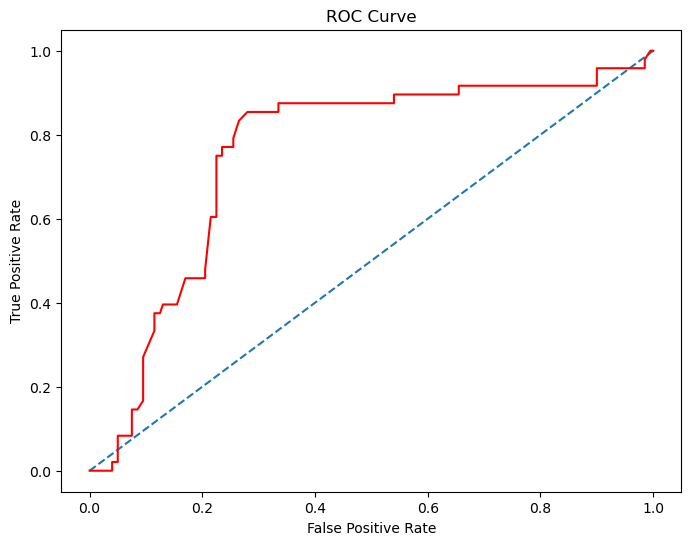

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = clf_lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1], '--')
plt.plot(fpr,tpr,'r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [25]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.75484375
